In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from warnings import filterwarnings
sc.settings.verbosity = 3
filterwarnings('ignore', category=FutureWarning)
sc.set_figure_params(figsize=(5, 5))

In [2]:
output_dir = "../../data/50_myeloid_cells/01_myeloid_subset/"

# Extract myeloid cells from integrated lung cancer dataset

In [3]:
adata_raw_counts = sc.read_h5ad(
    "/home/sturm/projects/2020/pircher-scrnaseq-lung/data/50_integrate_scrnaseq_data/merged_nsclc_heterogeneity.h5ad"
)

In [4]:
adata = sc.read_h5ad(
    "../../data/40_dorothea_progeny/40_primary_tumor_dorothea_progeny.h5ad"
)

In [5]:
adata.obs.to_csv(f"{output_dir}/obs.csv")

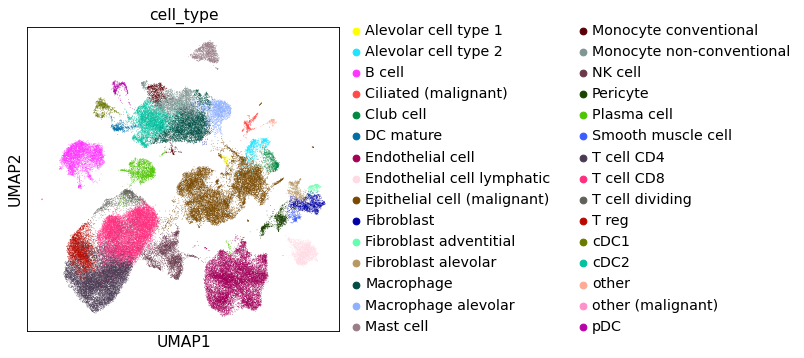

In [6]:
sc.pl.umap(adata, color="cell_type")

In [7]:
tmp_adata = adata[
    adata.obs["cell_type"].isin(
        [
            "Macrophage",
            "Monocyte conventional",
            "Monocyte non-conventional",
            "cDC1",
            "cDC2",
            "DC mature",
            "Macrophage alevolar",
        ]
    ),
    :,
].copy()
adata = tmp_adata

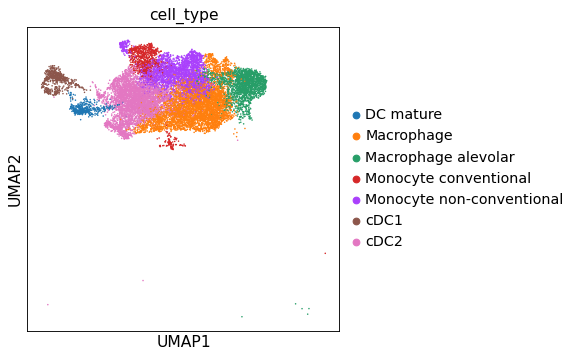

In [8]:
sc.pl.umap(adata, color="cell_type")

## Export raw counts for analysis in R

In [9]:
pd.DataFrame(adata.X.T.toarray(), columns=adata.obs_names, index=adata.var_names).to_csv(f"{output_dir}/X.csv")

## Export anndata with raw counts for analysis with scVI and DE methods

In [10]:
adata_scvi = adata.copy()
adata_scvi.X = adata_raw_counts[adata_scvi.obs_names, :].X.astype("int")

In [11]:
adata.write_h5ad(f"{output_dir}/adata.h5ad")
adata_scvi.write_h5ad(f"{output_dir}/adata_scvi.h5ad")